In [3]:
# @author : Brian KYANJO
# @date : 04-10-2023
# @description : This script is used to visualize the BC_IC data and hydrological data including DEM files


%matplotlib notebook
%pylab
%matplotlib inline
import pandas as pd
import rasterio

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [ ]:
#  Load data
# ---------------- test1 ----------------
test1bc = pd.read_csv('Test1/Test1BC.csv')
test1bed = pd.read_csv('Test1/test1_z.csv')

#  Calculate the bed elevation (from DEM file)
nx = 371
ny = 71
ax = -20
bx = 700
ay = -20
by = 100
z0 = 9.7
zn = 10.35
z1 = test1bed['z'][:nx]
x = linspace(ax,bx,len(z1))
# y = linspace(ay,by,ny)

#  read DEM file
# dem = pd.read_csv('Test1/test1DEM_.topo',header=None)
# dem
# z1[:nx]
test1bc

In [ ]:
# ---------------- ploting ----------------
figure(1)
figure(figsize=(8, 2), dpi=300)
plot(test1bc['Time (mins)'], test1bc['Water level (m)'], 'b-',label='BC')
xlim(0,1200)
ylim(9.5,10.5)
grid()
xlabel('Time (mins)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
ylabel('Water level (m)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
xticks(fontweight='bold')
yticks(fontweight='bold')
# gca().minorticks_off()
savefig('Test1BC.png')
# show()



In [ ]:
figure(2)
figure(figsize=(8, 2), dpi=300)
plot(x, z1,'b-', label='Bed elevation')
plot(x[where(x>0)[0][0]],z1[where(x>0)[0][0]],'r*',label='BC')
plot(x[where(x>400)[0][0]],z1[where(x>400)[0][0]],'ro',label='P1')
plot(x[where(x>600)[0][0]],z1[where(x>600)[0][0]],'ro',label='P2')
xlim(-20,700)
ylim(9.5,10.5)
grid()
xlabel('x (m)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
ylabel('z (m)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
legend(['Bed elevation','BC','P1','P2'], prop={'size': 8, 'weight': 'bold'}, loc='best')
xticks(fontweight='bold')
yticks(fontweight='bold')
# gca().minorticks_off()
savefig('Test1bed.png')
show()

In [8]:
#  Load data
# ---------------- test2 ----------------
# test2bc = pd.read_csv('Test2/Test2_BC.csv')
# test2bed = pd.read_csv('Test2/test2_z.csv')

#  Calculate the bed elevation (from DEM file)
# nx = 1201
# ny = 1201
# ax = -200
# bx = 2000
# ay = -200
# by = 2000

# z2 = test1bed['z'][:nx]
# x2 = linspace(ax,bx,len(z2))
# y = linspace(ay,by,ny)

file_path = 'scratch/Test6BDEM.asc'

# open the file using rasterio
with rasterio.open(file_path) as src:
    # read the data
    data = src.read(1)
    # get the metadata
    meta = src.meta
    # get the bounds
    bounds = src.bounds
    # get the resolution
    res = src.res
    # get the number of rows and columns
    rows, cols = data.shape
    # get the geotransform
    transform = src.transform

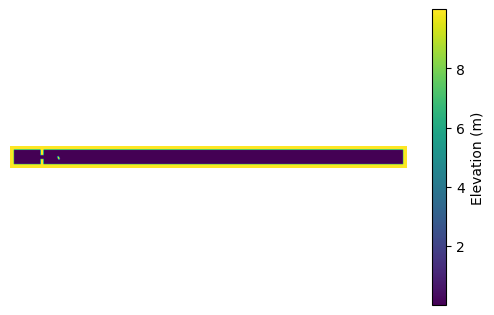

In [11]:
# ---------------- ploting ----------------
# figure(3)
# figure(figsize=(8, 2), dpi=300)
# plot(test2bc['Time (min)'], test2bc['Inflow (cumecs)'],'b-', label='BC')
# xlim(0,180)
# ylim(0,25)
# grid()
# xlabel('Time (mins)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
# ylabel('inflow ($m^3/s$)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
# xticks(fontweight='bold')
# yticks(fontweight='bold')
# gca().minorticks_off()
# savefig('Test2BC.png')
# # show()

figure(4)
import matplotlib.colors as mcolors
# Define the "terrain" colormap
terrain_cmap = mcolors.ListedColormap([
    "#0E7D11", "#449C33", "#65A150", "#87B56F", "#A8C78E",
    "#C9DAAF", "#EBF3D0", "#F5E3AB", "#F3C080", "#F1A453",
    "#EE8627", "#EB6700", "#E14400", "#D51900", "#BA1A00",
    "#9E1C00", "#831D00", "#681F00", "#4D2000"])


# figure(figsize=(4, 4), dpi=300)
imshow(data)



# remove axis ticks
ax = gca()
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
#  remve axis labels
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

#  remove the frame
ax.set_frame_on(False)

# insert a minor grid
ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

#  invert the y axis
gca().invert_yaxis()

# add a colorbar with the same dimensions as the plot
colorbar(shrink=0.8,label = 'Elevation (m)')
savefig('Test2DEM.png')
show()

In [ ]:
#  Load data
# ---------------- test3 ----------------
test4bc = pd.read_csv('Test4/Test4BC.csv')

ax = 0
bx = 600

x4 = linspace(ax,bx,len(test4bc['Time (min)']))
test4bc

In [ ]:
# ---------------- ploting ----------------
figure(5)
figure(figsize=(8, 2), dpi=300)
plot(test4bc['Time (min)'], test4bc['Inflow (cumecs)'],'b-', label='BC')
xlim(0,600)
ylim(0,25)
grid()
xlabel('Time (mins)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
ylabel('inflow ($m^3/s$)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
xticks(fontweight='bold')
yticks(fontweight='bold')
gca().minorticks_off()
savefig('Test4BC.png')
show()

In [ ]:
file_path = 'scratch/test1DEM.asc'

# open the file using rasterio
with rasterio.open(file_path) as src:
    # read the data
    data = src.read(1)
    # get the metadata
    meta = src.meta
    # get the bounds
    bounds = src.bounds
    # get the resolution
    res = src.res
    # get the number of rows and columns
    rows, cols = data.shape
    # get the geotransform
    transform = src.transform

In [ ]:
figure(6)
import matplotlib.colors as mcolors
# Define the "terrain" colormap
terrain_cmap = mcolors.ListedColormap([
    "#0E7D11", "#449C33", "#65A150", "#87B56F", "#A8C78E",
    "#C9DAAF", "#EBF3D0", "#F5E3AB", "#F3C080", "#F1A453",
    "#EE8627", "#EB6700", "#E14400", "#D51900", "#BA1A00",
    "#9E1C00", "#831D00", "#681F00", "#4D2000"])


figure(figsize=(4, 4), dpi=300)
imshow(data, cmap=terrain_cmap)



# remove axis ticks
ax = gca()
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
#  remve axis labels
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

#  remove the frame
ax.set_frame_on(False)

# insert a minor grid
ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

#  invert the y axis
gca().invert_yaxis()

# add a colorbar with the same dimensions as the plot
colorbar(shrink=0.8,label = 'Elevation (m)')
savefig('Test1DEM.png')
show()

In [ ]:
# load data
bc = pd.read_csv('scratch/bc_.csv')

# bc = array(bc)
bc['Time (mins)'] = bc['Time (mins)']*60
bc

In [ ]:
time = bc['Time (mins)']
z  = bc['Water level (m)']
time = array(time)
z = array(z)

In [ ]:
# write a routine that linearly interpolates z at the time points in time
#  and returns the interpolated values in zinterp
def interp(t,time,z):
    # zinterp = zeros(len(time))
    # for i in range(len(time)):
    if t < time[0]:
        zinterp = z[0]
    elif t > time[-1]:
        zinterp = z[-1]
    else:
        for j in range(len(time)-1):
            if t >= time[j] and t <= time[j+1]:
                zinterp = z[j] + (z[j+1]-z[j])/(time[j+1]-time[j])*(t-time[j])
    return zinterp




In [ ]:
t = 40090
zi = interp(t,time,z) 
zi

In [ ]:
t = linspace(0,80000,1000)
zi = zeros(len(t))
for i in range(len(t)):
    zi[i] = interp(t[i],time,z)

figure(7)
plot(time,z,'b-',label='BC')